# Logistic Regression with Gradient Descent

## Import data and libraries

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
X_train = np.array([[0.08, 0.72], [0.26, 0.58], [0.45, 0.15], [0.60, 0.30], [0.10, 1.0], [0.35, 0.95], [0.70, 0.65], [0.92, 0.45]])
y_train = np.array([1, 1, 1, 1, 0, 0, 0, 0])
X_test = np.array([[0.10, 0.9], [0.4, 0.2], [0.8, 0.5], [0.2, 0.6]])

## Visualize the data

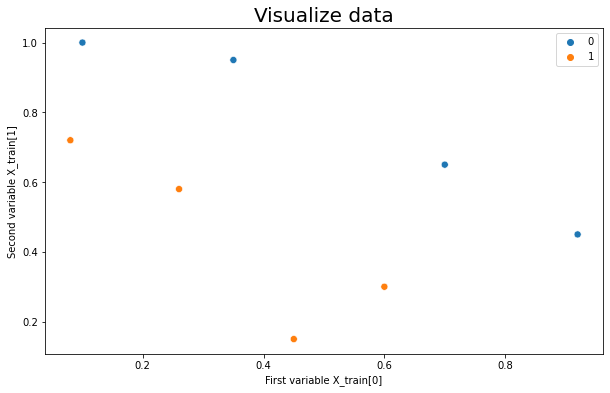

In [4]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, s=50)

plt.xlabel("First variable X_train[0]")
plt.ylabel("Second variable X_train[1]")
plt.title("Visualize data", fontsize=20)
plt.show()

## Gradient Descent

Sebelum kita training, kita lakukan standardisasi terhadap data training.

In [192]:
class gradient_descent:
  def __init__(self, nvar):
    self.intercept = 0
    self.theta = np.random.randn(nvar)

  def sigmoid(self, y):
    return 1/(1 + np.exp((-1)*y))

  def predict(self, X, theta, intercept):
    y_raw = np.array(intercept + np.dot(X, theta))
    y_pred = self.sigmoid(y_raw)
    return y_pred

  def update_theta(self, X, y, y_pred, alpha):
    deriv_theta = np.dot((y_pred - y), X)
    return self.theta - (alpha * deriv_theta)

  def update_intercept(self, y, y_pred, alpha):
    deriv_intercept = np.sum(y_pred - y)
    return self.intercept - (alpha * deriv_intercept)

  def cross_entropy(self, y, y_pred):
    ce = np.dot((-1 * y), np.log(y_pred)) - np.dot((1 - y), np.log(1 - y_pred))
    return ce

  def fit(self, X, y, epochs, alpha):
    loss = []
  
    for i in range(epochs):
      y_pred = self.predict(X, self.theta, self.intercept)
      self.theta = self.update_theta(X, y, y_pred, alpha)
      self.intercept = self.update_intercept(y, y_pred, alpha)
      loss.append(self.cross_entropy(y, y_pred))
      # if i % 100 == 0:
      #   print(f'[{i}] Loss: {loss[i]}')

    return loss

In [193]:
all_loss = []

for alpha in [0.1, 0.5, 0.9]:
  model = gradient_descent(X_train.shape[1])
  epochs = 80000
  loss = model.fit(X_train, y_train, epochs, alpha)
  print(f'{alpha}')
  print(f'Intercept: {model.intercept}')
  print(f'Theta: {model.theta}')

  all_loss.append([alpha, loss])

0.1
Intercept: 35.117762705836064
Theta: [-26.90395135 -37.94146002]
0.5
Intercept: 44.52155025695489
Theta: [-33.92911226 -48.16538143]
0.9
Intercept: 48.00129595608332
Theta: [-36.52217412 -51.94934921]


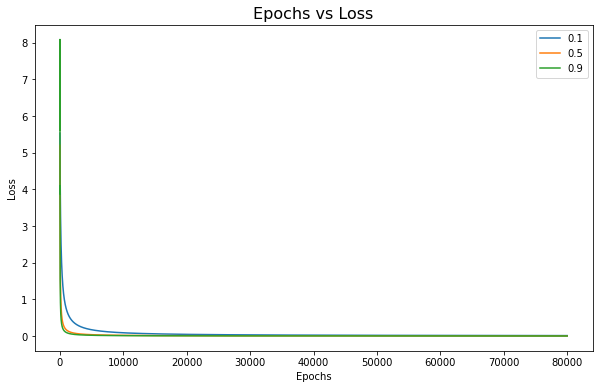

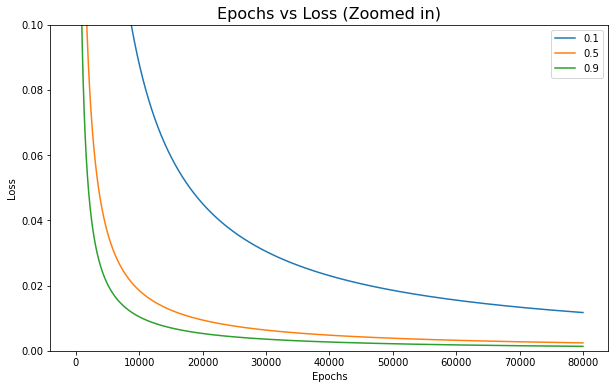

In [194]:
# View semua proses penurunan loss untuk alpha yang berbeda
plt.figure(figsize=(10, 6))
for i in range(len(all_loss)):
  plt.plot(np.arange(1, epochs), all_loss[i][1][1:], label=all_loss[i][0])

plt.title('Epochs vs Loss', fontsize=16)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Zoomed in
plt.figure(figsize=(10, 6))
for i in range(len(all_loss)):
  plt.plot(np.arange(1, epochs), all_loss[i][1][1:], label=all_loss[i][0])

plt.title('Epochs vs Loss (Zoomed in)', fontsize=16)
plt.ylim([0, 0.1])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Kita bisa melihat dari chart di atas bahwa alpha atau learning rate 0.9 menghasilkan loss atau cross entropy cost yang paling mendekati 0.

## Build Final Model

In [203]:
# Kita bangun model baru dengan epoch 8000 dan learning rate 0.9
model = gradient_descent(X_train.shape[1])
epochs = 80000
_ = model.fit(X_train, y_train, epochs, 0.9)

In [196]:
b = model.intercept
b

48.001218515874434

In [197]:
w = model.theta
w

array([-36.52211645, -51.949265  ])

## Predict and Evaluate

Setelah kita predict x dengan h(x) (disini saya memakai function predict()), dan setelah kita masukkan ke dalam rumus sigmoid g(h(x)), hasilnya akan terbatas antara [0,1]. Dari situ, kita bisa menggunakan threshold 0.5 untuk mengkonversi hasil dari fungsi sigmoid yang berupa probability menjadi kategori 0 dan 1.

In [204]:
def threshold(y):
  return [1 if i >= 0.5 else 0 for i in y]

In [208]:
def cross_entropy(y, y_pred):
    ce = np.dot((-1 * y), np.log(y_pred)) - np.dot((1 - y), np.log(1 - y_pred))
    return ce

### On Train Data

In [210]:
y_pred_raw = model.predict(X_train, w, b)
y_pred = threshold(y_pred_raw)
pd.DataFrame({
    'y_true': y_train,
    'y_pred': y_pred,
    'y_raw': y_pred_raw
})

,y_true,y_pred,y_raw
0,1,1,9.995364e-01
1,1,1,9.997695e-01
2,1,1,1.000000e+00
3,1,1,9.999726e-01
4,0,0,5.000721e-04
5,0,0,7.277380e-07
6,0,0,1.199168e-05
7,0,0,1.263539e-04


In [211]:
cost = cross_entropy(y_train, y_pred_raw)
print(f'Cost untuk train data: {cost}')

Cost untuk train data: 0.0013610140525389996


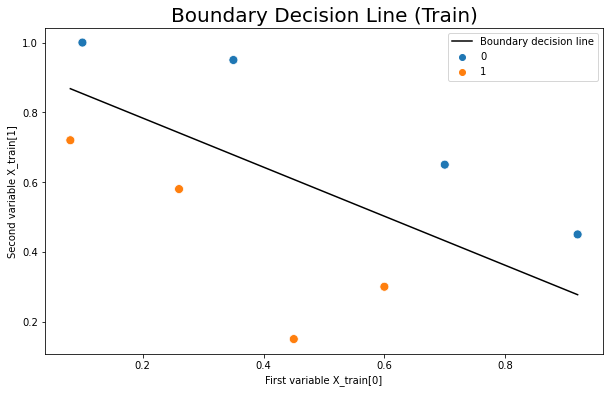

In [219]:
plt.figure(figsize=(10, 6))

y_grs = (-1 * b / w[1]) + ((-1 * w[0]/w[1]) * X_train[:, 0])

sns.lineplot(x=X_train[:, 0], y=y_grs, label='Boundary decision line', color='black')
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, s=80)

plt.xlabel("First variable X_train[0]")
plt.ylabel("Second variable X_train[1]")
plt.title("Boundary Decision Line (Train)", fontsize=20)
plt.show()

Boundary decision line kita untuk train data cukup bagus, kita hanya mendapatkan cost sebesar 0.1%.

### On Test Data

In [201]:
y_test_raw = model.predict(X_test, w, b)
y_test_pred = threshold(y_test_raw)
pd.DataFrame({
    'y_pred': y_test_pred,
    'y_raw': y_test_raw
})

,y_pred,y_raw
0,0,0.082767
1,1,1.000000
2,0,0.000753
3,1,0.999927


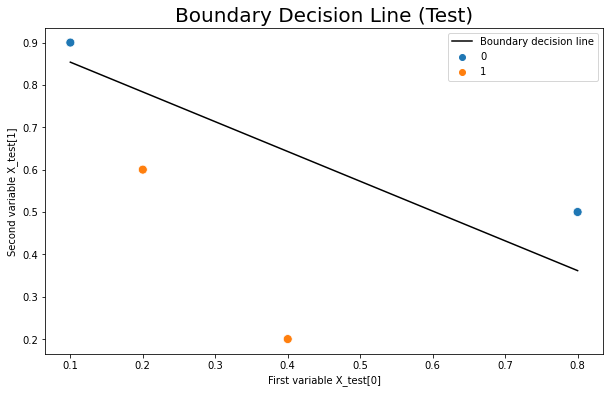

In [218]:
plt.figure(figsize=(10, 6))

y_grs = (-1 * b / w[1]) + ((-1 * w[0]/w[1]) * X_test[:, 0])

sns.lineplot(x=X_test[:, 0], y=y_grs, label='Boundary decision line', color='black')
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test_pred, s=80)

plt.xlabel("First variable X_test[0]")
plt.ylabel("Second variable X_test[1]")
plt.title("Boundary Decision Line (Test)", fontsize=20)
plt.show()

Demikianlah boundary decision line yang didapatkan model menggunakan gradient descent untuk test data.